In [77]:
import pandas as pd

df = pd.read_csv("train.csv")

,0
Unnamed: 0,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.034206
Engine,0.615700


,0
Unnamed: 0,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.034429
Engine,0.000000


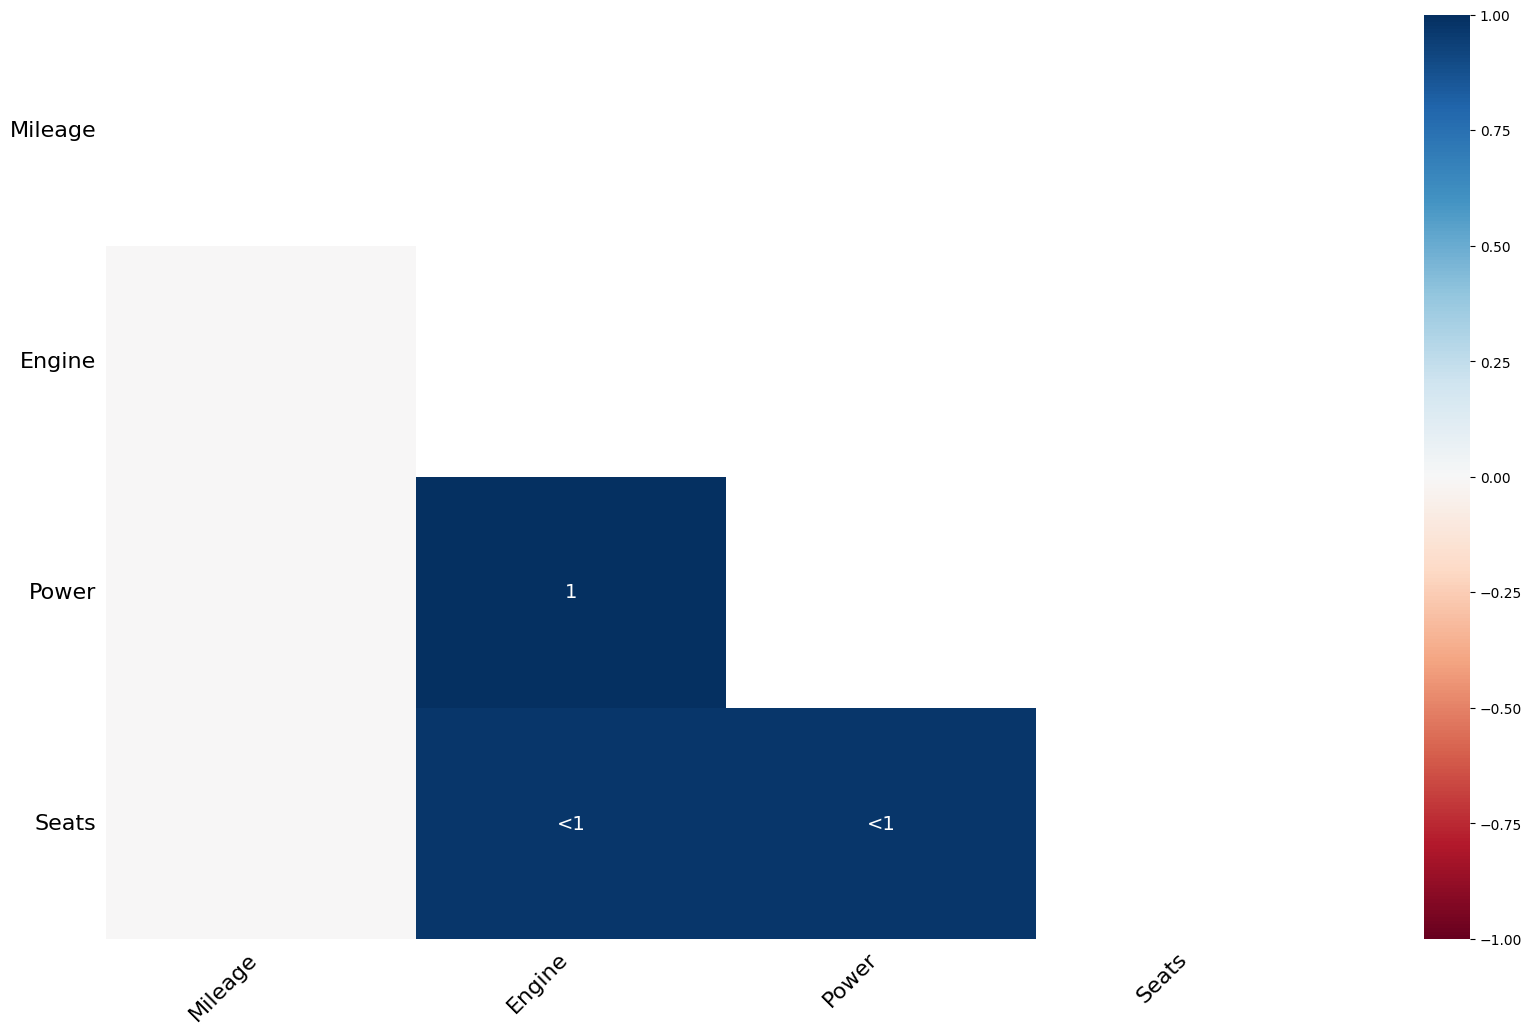

In [78]:
# Handle missing values

# Check for missing values
# Use 30% rule
display((df.isnull().sum()) / len(df) * 100)

# New_Price has 86% missing, so this column should be dropped
df = df.drop("New_Price", axis=1, inplace=False)

# Mileage, engine, power, and seats have <1% missing values.
# First, check to see if there is a pattern where these values are missing along side each other
import missingno as msno
msno.heatmap(df)

# Engine, power, and seats are highly correlated to one another when missing
# This means that listwise deletion is appropriate
df = df.dropna(subset=['Engine', 'Power', 'Seats'], inplace=False)
display((df.isnull().sum()) / len(df) * 100)

# Mileage will be imputed after the dataset is cleaned further. It will be an average as that
# is appropriate given the small amount that is missing

In [79]:
# Remove units/labels
# Convert to number types

# Convert engine
df['Engine'] = df['Engine'].str.replace(' CC', '').astype(int)

# Covnert power
df['Power'] = df['Power'].str.replace(' bhp', '').astype(float)

# Convert mileage into two features: mileage_by_liter and mileage_by_kg
df["mileage_by_liter"] = (
    df["Mileage"]
      .where(df["Mileage"].str.contains("kmpl"))
      .str.replace("kmpl", "", regex=False)
      .str.strip()
      .astype(float)
)

df["mileage_by_kg"] = (
    df["Mileage"]
      .where(df["Mileage"].str.contains("km/kg"))
      .str.replace("km/kg", "", regex=False)
      .str.strip()
      .astype(float)
)

df = df.drop("Mileage", axis=1)

df.head()

# New price is not needed as it has been dropped since it was missing too many instances

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,mileage_by_liter,mileage_by_kg
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5.0,12.50,19.67,NaN
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5.0,4.50,NaN,13.0
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7.0,6.00,20.77,NaN
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5.0,17.74,15.20,NaN
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,1461,63.10,5.0,3.50,23.08,NaN


In [80]:
display((df.isnull().sum()) / len(df) * 100)
# Since km_per_kg is moslty null, I will clean only mileage_by_liter.
# I will also drop this feature, since it is majority null.
# This will be replaced with the mean since 0.08% is a small amount
df = df.drop("mileage_by_kg", axis=1)

df['mileage_by_liter'] = df['mileage_by_liter'].fillna(df['mileage_by_liter'].mean())
display((df.isnull().sum()) / len(df) * 100)

,0
Unnamed: 0,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Engine,0.000000
Power,0.000000


,0
Unnamed: 0,0.0
Name,0.0
Location,0.0
Year,0.0
Kilometers_Driven,0.0
Fuel_Type,0.0
Transmission,0.0
Owner_Type,0.0
Engine,0.0
Power,0.0


In [81]:
# One-hot encode Fuel_Type and Transmission
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'], dtype=int)

In [82]:
# Create a feature
# The feature that I will be creating is age, which is current_year - Year

current_year = 2025
df['Age'] = current_year - df['Year']

In [83]:
# Select, filter, rename, mutate, arrange, and summarize

# select
# same as
# SELECT Name, Year From df;
display(df[['Name', 'Year']].head())

display("=======================================================================")

# filter
# same as select * From df where age > 15;
display((df[df['Age'] > 15]).head())

display("=======================================================================")

# Rename
df.rename(columns={'Age': "Age_Years"}, inplace=True)
display(df.head())

display("=======================================================================")

# Mutate
df = df.assign(Age_Months = df['Age_Years'] * 12)
display(df.head())

display("=======================================================================")

# Arrange
df_sorted_by_age = df.sort_values(by='Age_Years', ascending=True)
display(df_sorted_by_age.head())

# Summarize

display(df.groupby('Location')['Power'].mean())


,Name,Year
0,Hyundai Creta 1.6 CRDi SX Option,2015
1,Honda Jazz V,2011
2,Maruti Ertiga VDI,2012
3,Audi A4 New 2.0 TDI Multitronic,2013
4,Nissan Micra Diesel XV,2013


'======================================================================='

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats,Price,mileage_by_liter,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age
27,29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Fourth & Above,2494,102.0,7.0,4.00,12.8,1,0,0,0,1,18
33,35,Maruti Wagon R LXI BSIII,Jaipur,2009,83816,Second,1061,64.0,5.0,1.85,14.0,0,0,1,0,1,16
38,40,Maruti Alto LXi,Delhi,2008,90000,Second,796,46.3,5.0,1.25,19.7,0,0,1,0,1,17
44,46,Hyundai Elantra CRDi,Ahmedabad,2008,58005,Second,1991,112.2,5.0,4.25,14.9,1,0,0,0,1,17
64,66,Honda City ZX CVT,Mumbai,2007,63000,Second,1497,78.0,5.0,1.85,16.4,0,0,1,1,0,18


'======================================================================='

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats,Price,mileage_by_liter,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age_Years
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,1582,126.20,5.0,12.50,19.670000,1,0,0,0,1,10
1,2,Honda Jazz V,Chennai,2011,46000,First,1199,88.70,5.0,4.50,18.206864,0,0,1,0,1,14
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,1248,88.76,7.0,6.00,20.770000,1,0,0,0,1,13
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,1968,140.80,5.0,17.74,15.200000,1,0,0,1,0,12
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,1461,63.10,5.0,3.50,23.080000,1,0,0,0,1,12


'======================================================================='

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats,Price,mileage_by_liter,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age_Years,Age_Months
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,1582,126.20,5.0,12.50,19.670000,1,0,0,0,1,10,120
1,2,Honda Jazz V,Chennai,2011,46000,First,1199,88.70,5.0,4.50,18.206864,0,0,1,0,1,14,168
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,1248,88.76,7.0,6.00,20.770000,1,0,0,0,1,13,156
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,1968,140.80,5.0,17.74,15.200000,1,0,0,1,0,12,144
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,1461,63.10,5.0,3.50,23.080000,1,0,0,0,1,12,144


'======================================================================='

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats,Price,mileage_by_liter,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age_Years,Age_Months
1743,1797,Toyota Etios Liva 1.2 VX Dual Tone,Coimbatore,2019,20877,First,1197,78.90,5.0,7.27,18.16,0,0,1,0,1,6,72
4678,4817,Hyundai Elantra CRDi SX,Coimbatore,2019,41871,First,1582,126.20,5.0,15.57,22.70,1,0,0,0,1,6,72
65,67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,First,1950,194.00,5.0,35.67,0.00,1,0,0,1,0,6,72
4458,4591,Audi A4 35 TDI Technology Edition,Kochi,2019,38163,First,1968,174.33,5.0,32.91,17.11,1,0,0,1,0,6,72
552,572,Hyundai Verna 1.6 SX CRDI (O) AT,Coimbatore,2019,77240,First,1582,126.32,5.0,8.31,22.32,1,0,0,1,0,6,72


,Power
Location,
Ahmedabad,110.640138
Bangalore,132.592680
Chennai,108.409495
Coimbatore,125.502027
Delhi,121.162766
Hyderabad,109.802158
Jaipur,93.873337
Kochi,115.395542
Kolkata,101.750787


# Problem 2

In [84]:
seed = 6
df = pd.read_csv('diabetes.csv')

Sample Mean Glucose: 118.36
Sample Max Glucose: 176
Population Mean Glucose: 120.89453125
Population Max Glucose: 199


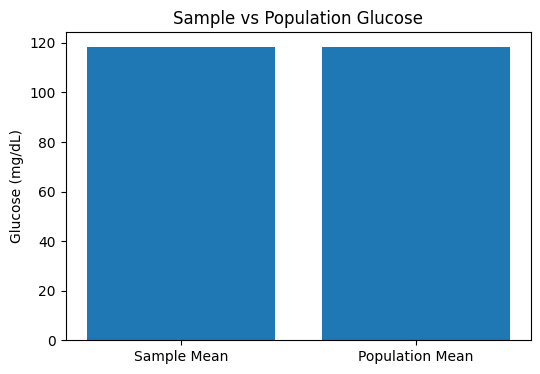

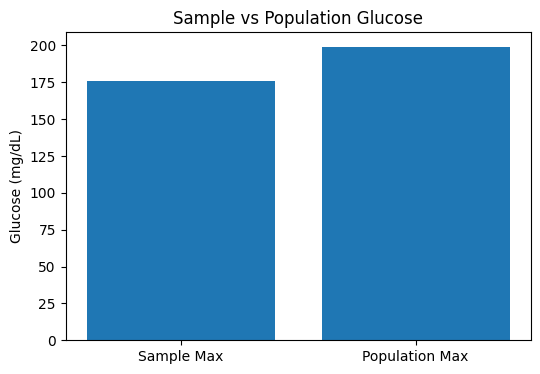

In [85]:
sample = df.sample(n=25, random_state=seed)

mean_glucose_sample = sample['Glucose'].mean()
max_glucose_sample = sample['Glucose'].max()

mean_glucose_population = df['Glucose'].mean()
max_glucose_population = df['Glucose'].max()

print(f"Sample Mean Glucose: {mean_glucose_sample}")
print(f"Sample Max Glucose: {max_glucose_sample}")
print(f"Population Mean Glucose: {mean_glucose_population}")
print(f"Population Max Glucose: {max_glucose_population}")

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar(["Sample Mean", "Population Mean"], [mean_glucose_sample, mean_glucose_sample])
plt.ylabel("Glucose (mg/dL)")
plt.title("Sample vs Population Glucose")

plt.show()

plt.figure(figsize=(6, 4))
plt.bar(["Sample Max", "Population Max"], [max_glucose_sample, max_glucose_population])
plt.ylabel("Glucose (mg/dL)")
plt.title("Sample vs Population Glucose")

plt.show()

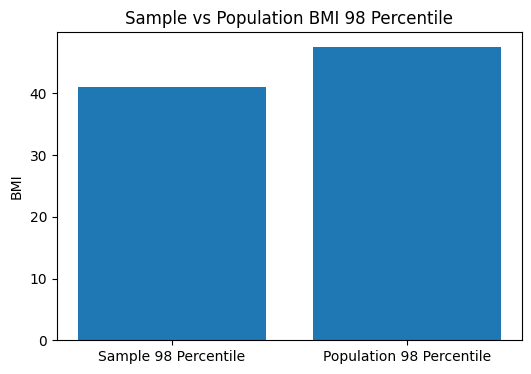

In [86]:
# 98 percentile
bmi_98_percentile_sample = sample['BMI'].quantile(0.98)
bmi_98_percentile_population = df['BMI'].quantile(0.98)

plt.figure(figsize=(6, 4))
plt.bar(
    ["Sample 98 Percentile", "Population 98 Percentile"],
     [bmi_98_percentile_sample, bmi_98_percentile_population]
)
plt.ylabel("BMI")
plt.title("Sample vs Population BMI 98 Percentile")

plt.show()


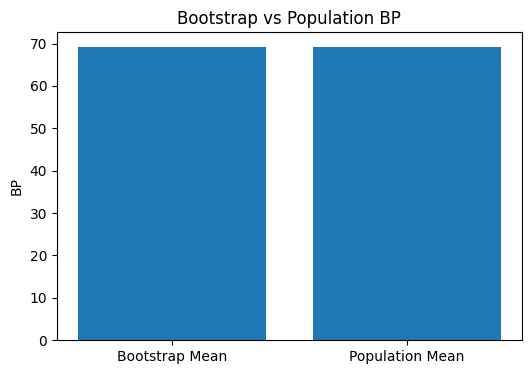

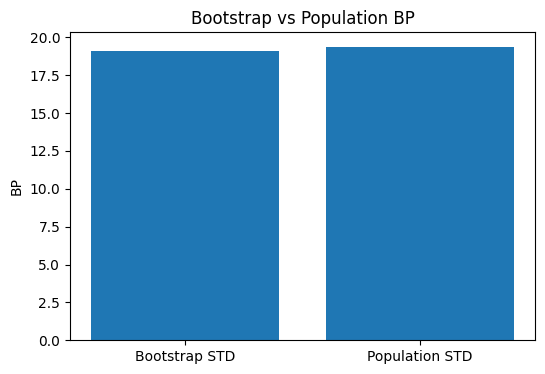

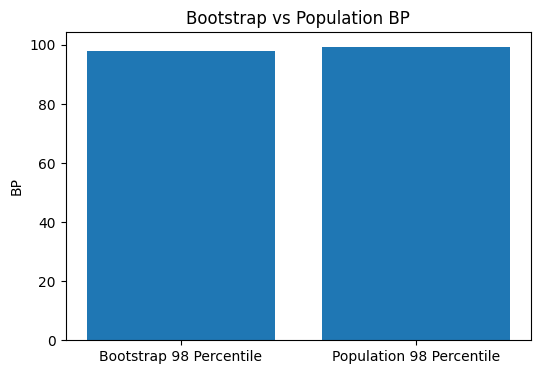

In [87]:
n = 500
size = 150
bp_df = df['BloodPressure']
results = []

for i in range(n):
  sample = bp_df.sample(n=size, replace=True)
  results.append({
      "mean": sample.mean(),
      "std": sample.std(),
      "98_percentile": sample.quantile(0.98)
  })

average_bootstrap_mean = sum([result['mean'] for result in results]) / n
average_bootstrap_std = sum([result['std'] for result in results]) / n
average_bootstrap_98_percentile = sum([result['98_percentile'] for result in results]) / n

population_mean = bp_df.mean()
population_std = bp_df.std()
population_98_percentile = bp_df.quantile(0.98)

plt.figure(figsize=(6, 4))
plt.bar(["Bootstrap Mean", "Population Mean"], [average_bootstrap_mean, population_mean])
plt.ylabel("BP")
plt.title("Bootstrap vs Population BP")

plt.show()

plt.figure(figsize=(6, 4))
plt.bar(["Bootstrap STD", "Population STD"], [average_bootstrap_std, population_std])
plt.ylabel("BP")
plt.title("Bootstrap vs Population BP")

plt.show()

plt.figure(figsize=(6, 4))
plt.bar(["Bootstrap 98 Percentile", "Population 98 Percentile"], [average_bootstrap_98_percentile, population_98_percentile])
plt.ylabel("BP")
plt.title("Bootstrap vs Population BP")

plt.show()

